# Computer Science 2XC3 - Graded Lab III

Please refer to the pdf for detailed instructions. The below file contains all the preliminary code you will need to work on the lab. You can copy paste instructions here to create one cohesive lab and organize it that best suits your teams workflow.

In [65]:
import random
import timeit
import matplotlib.pyplot as plt
import numpy as np
import math

In [66]:
class GraphI:

    # using hash map
    def __init__(self, edges):
        self.graph = {}
        for x,y in edges:
            if x not in self.graph.keys():
                self.graph[x]=[]
            self.graph[x].append(y)

    def has_edge(self, src, dst):
        return src in self.graph[dst]

    def get_graph_size(self,):
        return len(self.graph)

    def get_graph(self,):
        return self.graph

In [67]:
class GraphII:

    # using adjacency list
    def __init__(self, nodes):
        self.graph = []
        # node numbered 0-1
        for node in range(nodes):
            self.graph.append([])

    def has_edge(self, src, dst):
        return src in self.graph[dst]

    def add_edge(self,src,dst):
        if not self.has_edge(src,dst):
            self.graph[src].append(dst)
            self.graph[dst].append(src)

    def get_graph(self,):
        return self.graph

In [68]:
def depth_first_search(G,node,end_point=None):
    stack = [node]
    graph = G.get_graph()
    seen=set()

    while len(stack) !=0:
        node = stack.pop()
        # search for neighbours in graph
        if node not in seen:
            seen.add(node)
            print("Visited node:" + str(node))
            # if the given node has an edge
            if node in graph.keys():
                # iterate over edges of node
                for nn in graph[node]:

                    # limited traversal
                    if nn == end_point:
                        return True
                    # add to stack
                    stack.append(nn)

In [69]:
def is_vertex_cover_gi(graph, subset):
    """Check if subset is a vertex cover for a graph represented as in GraphI."""
    G = graph.get_graph()
    for node, edges in G.items():
        if not any((edge in subset or node in subset) for edge in edges):
            return False
    return True

In [70]:
#small graph where the correct vertex cover is {0, 2}
edges_test = [(0, 1), (0, 2), (2, 3)]
graph_test = GraphI(edges_test)

#known vertex cover for the test graph
known_vertex_cover = {0, 2}

assert is_vertex_cover_gi(graph_test, known_vertex_cover) == True, "is_vertex_cover_gi failed for known vertex cover"
print("is_vertex_cover_gi passed for known vertex cover.")


is_vertex_cover_gi passed for known vertex cover.


In [71]:
def MVC_gi(graph):
    """Compute the minimum vertex cover for a graph represented as in GraphI."""
    nodes = list(graph.get_graph().keys())
    subsets = power_set(nodes)
    min_cover = nodes
    for subset in subsets:
        if is_vertex_cover_gi(graph, subset):
            if len(subset) < len(min_cover):
                min_cover = subset
    return min_cover

In [72]:
#Breadth First Search
def breadth_first_search(G, node):
    stack = [node]
    graph = G.get_graph()
    seen=set()

    seen.add(node)

    while len(stack) > 0:
        node = stack[0]
        stack = stack[1:]
        print("Visiting node: " + str(node))
        if node in graph.keys():
            for nn in graph[node]:
                #if node == node2:
                #    return True
                if nn not in seen:
                    stack.append(nn)
                    seen.add(nn)


Part 2: Computing minimum vertex cover is a basic combinatorial optimization problem where the goal is to determine a minimum subset of vertices that cover all edges. The jupyter notebook contains a function to compute the minimum vertex cover for an undirected graph. It works for graphs for small node sizes (<30). Implement 3 different approximation algorithms for the Vertex Cover Problem.

In [73]:
#Use the methods below to determine minimum vertex covers

def add_to_each(sets, element):
    copy = sets.copy()
    for set in copy:
        set.append(element)
    return copy

def power_set(set):
    if set == []:
        return [[]]
    return power_set(set[1:]) + add_to_each(power_set(set[1:]), set[0])

def is_vertex_cover(G, C):
    for start in G.adj:
        for end in G.adj[start]:
            if not(start in C or end in C):
                return False
    return True

def MVC(G):
    nodes = [i for i in range(G.get_size())]
    subsets = power_set(nodes)
    min_cover = nodes
    for subset in subsets:
        if is_vertex_cover(G, subset):
            if len(subset) < len(min_cover):
                min_cover = subset
    return min_cover


In [74]:
# checking for vertex cover where graph is using hash map (GraphI)
def is_vertex_cover_hm(graph, C):
  G = graph.get_graph()

  for node in C:
    for n, edges in G.items():
        if node in edges:
            G[n].remove(node)


  for node in C:
      G[node]=[]


  is_vc = True

  for node,edges in G.items():
    if len(edges) != 0:
      is_vc = False
      break

  return is_vc


Part 2.1: Approx1 (graph) takes in an object of Graph and does the following:
1. Start with an empty set C = {}
2. Find the vertex with the highest degree in G, call this vertex v
3. Add v to C
4. Remove all edges incident to node v from G
5. If C is a Vertex Cover return C, else go to Step 2

# Approximation Algorithm for Vertex Cover: Approx1


In [75]:
class GraphI:
    """Graph representation using a hash map."""
    def __init__(self, edges):
        self.graph = {}
        for start, end in edges:
            if start not in self.graph:
                self.graph[start] = []
            if end not in self.graph:
                self.graph[end] = []
            self.graph[start].append(end)
            self.graph[end].append(start)

    def get_graph(self):
        """Returns the internal graph representation."""
        return self.graph


## Function Implementation


In [76]:
def approx1(graph):
    """
    Approximation algorithm to find a vertex cover of a graph.

    Parameters:
    - graph: An instance of GraphI, representing the graph.

    Returns:
    - A set representing the vertex cover.
    """
    # Create a copy of the graph to avoid mutating the original
    g_copy = graph.get_graph().copy()
    C = set()  # Initialize the vertex cover set

    while g_copy:
        # Find the vertex with the highest degree
        v = max(g_copy, key=lambda node: len(g_copy[node]))

        C.add(v)  # Add this vertex to the cover

        # Remove the selected vertex and its edges from the graph copy
        for adjacent in list(g_copy[v]):
            g_copy[adjacent].remove(v)
            if not g_copy[adjacent]:  # Remove the vertex if it has no more edges
                del g_copy[adjacent]
        del g_copy[v]  # Finally, remove the selected vertex itself

        if not any(g_copy.values()):  # Stop if no edges are left
            break

    return C


## Example Usage



In [77]:
# Example graph edges
edges_example = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 0)]

# Create a graph instance
graph_example = GraphI(edges_example)

# Find the vertex cover using Approx1
vertex_cover = approx1(graph_example)

print("Vertex Cover found by Approx1:", vertex_cover)


Vertex Cover found by Approx1: {0, 2, 3}


In [78]:
'''def approx1(G):
    working_copy = G.get_graph().copy()  # Make a copy of the graph
    C = set()  # Start with an empty set for the vertex cover

    while True:
        # Find the vertex v with the highest degree in the graph
        v, edges = max(working_copy.items(), key=lambda item: len(item[1]), default=(None, None))

        if v is None or len(edges) == 0:
            break  # Break if there are no more edges to cover

        C.add(v)  # Add v to the vertex cover set C

        # Remove all edges incident to v from the graph
        # This involves removing v from the graph and removing v from the adjacency lists of other vertices
        del working_copy[v]  # Remove the vertex itself
        for edges in working_copy.values():
            if v in edges:
                edges.remove(v)  # Remove v from other vertices' adjacency lists

    return C'''


"def approx1(G):\n    working_copy = G.get_graph().copy()  # Make a copy of the graph\n    C = set()  # Start with an empty set for the vertex cover\n\n    while True:\n        # Find the vertex v with the highest degree in the graph\n        v, edges = max(working_copy.items(), key=lambda item: len(item[1]), default=(None, None))\n\n        if v is None or len(edges) == 0:\n            break  # Break if there are no more edges to cover\n\n        C.add(v)  # Add v to the vertex cover set C\n\n        # Remove all edges incident to v from the graph\n        # This involves removing v from the graph and removing v from the adjacency lists of other vertices\n        del working_copy[v]  # Remove the vertex itself\n        for edges in working_copy.values():\n            if v in edges:\n                edges.remove(v)  # Remove v from other vertices' adjacency lists\n\n    return C"

In [79]:
'''# Define a small graph
edges_small = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]
graph_small = GraphI(edges_small)

# Apply approx1
vertex_cover_approx1 = approx1(graph_small)
print("Vertex cover found by approx1:", vertex_cover_approx1)

# Manual verification
# For the given graph, the expected behavior is to add the vertices with the highest degree to the cover.
# Given the graph structure, multiple correct covers could exist depending on the order vertices are processed.
# A valid cover for this graph could be any two consecutive vertices, as they cover all edges between them.
'''

'# Define a small graph\nedges_small = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]\ngraph_small = GraphI(edges_small)\n\n# Apply approx1\nvertex_cover_approx1 = approx1(graph_small)\nprint("Vertex cover found by approx1:", vertex_cover_approx1)\n\n# Manual verification\n# For the given graph, the expected behavior is to add the vertices with the highest degree to the cover.\n# Given the graph structure, multiple correct covers could exist depending on the order vertices are processed.\n# A valid cover for this graph could be any two consecutive vertices, as they cover all edges between them.\n'

Part 2.2: Approx2(graph) takes as an input, an object of Graph and does the following:

Start with an empty set C = {}
Select a vertex randomly from G which is not already C, call this vertex v
Add v to C
If C is a Vertex Cover return C, else go to Step 2

In [80]:
# import necessary modules
import random
# define the graph class to encapsulate the graph operations
class GraphI:
    def __init__(self, edges):
        """
        Initialize the graph with edges.
        - edges: A list of tuples (start, end) representing the edges of the graph.
        """
        self.graph = {}
        for start, end in edges:
            if start not in self.graph:
                self.graph[start] = []
            self.graph[start].append(end)
            if end not in self.graph:
                self.graph[end] = []
            self.graph[end].append(start)

    def get_graph(self):
        """Return the internal graph representation."""
        return self.graph

In [81]:
def approx2(G):

    graph = G.get_graph()  # Retrieve the graph representation
    vertex_cover = set()  # Initialize the vertex cover set

    # Continue until all edges are covered
    while any(graph[node] for node in graph):
        # Randomly select an uncovered vertex
        v = random.choice(list(graph.keys()))

        # Add the selected vertex to the vertex cover
        vertex_cover.add(v)

        # Remove the selected vertex and its edges from consideration
        for adjacent in list(graph[v]):
            graph[adjacent].remove(v)
            if not graph[adjacent]:  # If no more connections, remove the node
                del graph[adjacent]
        del graph[v]

    return vertex_cover

In [82]:
# Demonstrate the algorithm with an example
edges_example = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 0)]  # Example edges of a graph
graph_example = GraphI(edges_example)  # Create a graph instance
vertex_cover = approx2(graph_example)  # Find the vertex cover using the Approx2 algorithm

# Output the result
print("Vertex Cover found by Approx2:", vertex_cover)

Vertex Cover found by Approx2: {0, 2, 3, 4}


In [83]:
'''def approx2(G):
    working_copy = G.get_graph().copy()  # Make a copy of the graph
    C = set()  # Start with an empty set for the vertex cover
    vertices = list(working_copy.keys())  # List of vertices to choose from

    while vertices:
        v = random.choice(vertices)  # Randomly select a vertex v from the list of vertices
        C.add(v)  # Add v to the vertex cover set C

        # Remove all edges incident to v from the graph
        del working_copy[v]  # Remove the vertex itself
        for edges in working_copy.values():
            if v in edges:
                edges.remove(v)  # Remove v from other vertices' adjacency lists

        # Update vertices list to only include vertices with remaining edges
        vertices = [node for node in working_copy if working_copy[node]]

        # Check if C is a vertex cover:
        if is_vertex_cover_hm(G, C):
            break

    return C
'''

"def approx2(G):\n    working_copy = G.get_graph().copy()  # Make a copy of the graph\n    C = set()  # Start with an empty set for the vertex cover\n    vertices = list(working_copy.keys())  # List of vertices to choose from\n\n    while vertices:\n        v = random.choice(vertices)  # Randomly select a vertex v from the list of vertices\n        C.add(v)  # Add v to the vertex cover set C\n\n        # Remove all edges incident to v from the graph\n        del working_copy[v]  # Remove the vertex itself\n        for edges in working_copy.values():\n            if v in edges:\n                edges.remove(v)  # Remove v from other vertices' adjacency lists\n\n        # Update vertices list to only include vertices with remaining edges\n        vertices = [node for node in working_copy if working_copy[node]]\n\n        # Check if C is a vertex cover:\n        if is_vertex_cover_hm(G, C):\n            break\n\n    return C\n"

In [84]:
 '''# Apply approx2 multiple times
for trial in range(5):
    vertex_cover_approx2 = approx2(graph_small)
    print(f"Trial {trial}: Vertex cover found by approx2:", vertex_cover_approx2)

# Manual verification
# Ensure that the covers found in each trial are valid by manually checking that they cover all edges.
'''

'# Apply approx2 multiple times\nfor trial in range(5):\n   vertex_cover_approx2 = approx2(graph_small)\n   print(f"Trial {trial}: Vertex cover found by approx2:", vertex_cover_approx2)\n\n# Manual verification\n# Ensure that the covers found in each trial are valid by manually checking that they cover all edges.\n'

Part 2.3: Approx3(graph) takes as an input, an object of Graph and does the following:
1. Start with an empty set C = {}
2. Select an edge randomly from G, call this edge (u, v)
3. Add u and v to C
4. Remove all edges incident to u or v from G
5. If C is a Vertex Cover return C, else go to Step 2

Note: When you remove (or perform any other operation on) an edge, do not directly manipulate the graph, instead work on a local copy of the input graph.

In [85]:
import random

class GraphI:
    """
    A class to represent a graph using adjacency sets for efficient edge removal.
    """

    def __init__(self, edges):
        """
        Initializes the graph.

        Parameters:
        - edges: A list of tuples, each representing an edge between two vertices.
        """
        self.graph = {}
        for start, end in edges:
            if start not in self.graph:
                self.graph[start] = set()
            if end not in self.graph:
                self.graph[end] = set()
            self.graph[start].add(end)
            self.graph[end].add(start)

    def get_graph(self):
        """
        Returns the internal graph representation.
        """
        return self.graph

In [86]:
def approx3(G):
    """
    Implements the Approx3 algorithm to find a vertex cover of a graph G.

    Parameters:
    - G: An instance of the GraphI class.

    Returns:
    - A set representing the vertices that form a vertex cover of the graph.
    """
    # Copy the graph to avoid mutating the original
    working_graph = {node: set(adj) for node, adj in G.get_graph().items()}

    # Initialize an empty set for the vertex cover
    C = set()

    # Continue until no more edges can be selected
    while any(working_graph.values()):  # Check if there's any edge left
        edges = [(node, adj_node) for node, adj_nodes in working_graph.items() for adj_node in adj_nodes]
        if not edges:  # If there are no edges left, break out of the loop
            break

        # Randomly select an edge
        u, v = random.choice(edges)

        # Add both vertices of the edge to the vertex cover
        C.add(u)
        C.add(v)

        # Remove all edges incident to either u or v
        for vertex in [u, v]:
            for adj in list(working_graph.get(vertex, [])):
                working_graph[adj].discard(vertex)
                if not working_graph[adj]:  # If no more adjacent, consider removing the vertex
                    del working_graph[adj]
            if vertex in working_graph:
                del working_graph[vertex]

    return C


In [87]:
def approx3(G):
    working_copy = G.get_graph().copy()  # Make a copy of the graph
    C = set()  # Start with an empty set for the vertex cover

    # Flatten the list of edges and remove duplicates
    edges = [(node, adj_node) for node, adj_list in working_copy.items() for adj_node in adj_list]
    edges = list(set([tuple(sorted(edge)) for edge in edges]))  # Ensure each edge is unique and undirected

    while edges:
        u, v = random.choice(edges)  # Randomly select an edge from the list of edges

        C.add(u)  # Add both vertices of the edge to the vertex cover set C
        C.add(v)

        # Remove all edges incident to u or v from the list of edges
        edges = [edge for edge in edges if u not in edge and v not in edge]

        # Optionally, check if C is a vertex cover at this point
        # This check can be omitted for efficiency since the loop logic ensures covering all edges
        # if is_vertex_cover_hm(G, C):
        #     break

    return C

Part 2.4: Evaluate whether (or not) the above algorithms return the minimum vertex covers. In case they do not compute how far off the minimum is? For a given random graph with n nodes and e edges, what proportion of the minimum vertex cover is expected from approx1, approx2, approx3?

One important thing that you would need is what is the “actual” minimum vertex cover against which you are comparing, what is the baseline. Be creative here.

HINT: A potential experiment can be:
- Generate 100 random graphs with 6 nodes and e edges where e = {1,5,10,15,20}
- Find the minimum Vertex Cover (MVC) for each graph, and sum the size of all these MVCs (this can be a potential baseline).
- Run each of your approximations on each of the same 100 graphs (do not modify the graphs within your experiment). Keep track of the sum of the sizes of each approximation’s Vertex Covers
- Then you can measure an approximation’s expected performance by looking at that
approximation’s size sum over the sum of all MVCs
- Graph each of the approximation’s “expected performance” as it relates to the number of edges on the graph.

In total, you should have at least three meaningful graphs in this section. This does not mean 1 graph for each approximation! You should be able to plot each of the approximation’s curves on a single graph.

Some questions to consider in your experiment:

- Is there a relationship between how good we would expect an approximation to be and the number of edges in a graph? In general, does the approximation get better/worse as the number of edges increases/decreases?
- Is there a relationship between how good we would expect an approximation to be and the number of nodes in a graph? In general, does the approximation get better/worse as the number of
nodes increases/decreases?
- The approach described in the Potential Experiment is getting at the average performance of the approximation. What about the worst case of the approximation? To figure that out we would have to test our approximations on every single graph for approx1(). And for the other two the non-deterministic nature of the algorithms makes this even more problematic. However, we may be able to test the worst case for approx1() on very small graphs. How would you generate all graphs of size 5 for example?

Discuss these in your reflection section.

##2.4.1 Generate Random Graphs
First, we'll need to generate random graphs as the foundation for our experiment. Here, we aim to understand how the approximations perform compared to the minimum vertex cover (MVC).

In [89]:
import random
from itertools import combinations

def generate_all_edges(n):
    return [(i, j) for i in range(n) for j in range(i + 1, n)]

def generate_random_graphs(n_nodes, edge_counts, n_graphs):
    all_edges = generate_all_edges(n_nodes)
    # Ensure not to sample more edges than available
    random_graphs = {e: [random.sample(all_edges, min(e, len(all_edges))) for _ in range(n_graphs)] for e in edge_counts}
    return random_graphs

n_nodes = 6
edge_counts = [1, 5, 10, 15, 20]
n_graphs = 100

random_graphs = generate_random_graphs(n_nodes, edge_counts, n_graphs)

# This adjustment ensures that the sampling process is always valid.


##2.4.2 Compute Minimum Vertex Cover (MVC)
To compare the approximation algorithms' performance, we first need to find the MVC for our generated graphs.

In [29]:
def is_vertex_cover(graph, subset):
    for u, v in graph:
        if u not in subset and v not in subset:
            return False
    return True

def MVC(graph):
    nodes = set([u for u, v in graph] + [v for u, v in graph])
    for r in range(len(nodes) + 1):
        for subset in combinations(nodes, r):
            if is_vertex_cover(graph, subset):
                return set(subset)

mvc_sizes = {e: [len(MVC(graphs)) for graphs in random_graphs[e]] for e in edge_counts}


##2.4.3 Apply Approximation Algorithms
Here, we apply approx1, approx2, and approx3 to each generated graph and compute the size of vertex covers they find.

In [30]:
# Assuming approx1, approx2, and approx3 are defined as in previous instructions

approx_results = {
    e: {
        'approx1': [len(approx1(GraphI(graph))) for graph in random_graphs[e]],
        'approx2': [len(approx2(GraphI(graph))) for graph in random_graphs[e]],
        'approx3': [len(approx3(GraphI(graph))) for graph in random_graphs[e]],
    } for e in edge_counts
}


In [49]:
# manual graph creation with a known MVC size
known_edges = [(0, 1), (1, 2), (2, 3)]  # A simple chain graph where MVC size is 2
known_graph = GraphI(known_edges)
known_mvc_size = len(MVC_gi(known_graph))
print(f"Known graph edges: {known_edges}, Computed MVC size: {known_mvc_size}")


Known graph edges: [(0, 1), (1, 2), (2, 3)], Computed MVC size: 2


In [90]:
# 2.4.1 Generate Random Graphs

# Necessary Imports
import random
import matplotlib.pyplot as plt
import numpy as np

# Function to generate random graphs
def generate_random_graph(n_nodes, n_edges):
    edges = []
    possible_edges = [(i, j) for i in range(n_nodes) for j in range(i+1, n_nodes)]
    selected_edges = random.sample(possible_edges, min(n_edges, len(possible_edges)))
    return selected_edges

# Parameters
n_nodes = 6
edge_counts = [1, 5, 10, 15, 20]
n_graphs = 100

# Generating random graphs
random_graphs = {e: [generate_random_graph(n_nodes, e) for _ in range(n_graphs)] for e in edge_counts}

# Example debug output
for e, graphs in random_graphs.items():
    print(f"Edge count: {e}, Number of graphs: {len(graphs)}, First graph's edges: {graphs[0]}")



Edge count: 1, Number of graphs: 100, First graph's edges: [(1, 3)]
Edge count: 5, Number of graphs: 100, First graph's edges: [(0, 2), (0, 5), (0, 4), (4, 5), (1, 3)]
Edge count: 10, Number of graphs: 100, First graph's edges: [(2, 4), (1, 5), (0, 1), (0, 2), (3, 4), (4, 5), (3, 5), (0, 4), (2, 3), (2, 5)]
Edge count: 15, Number of graphs: 100, First graph's edges: [(3, 4), (2, 4), (2, 5), (1, 2), (1, 4), (1, 5), (0, 2), (0, 4), (3, 5), (4, 5), (0, 3), (0, 5), (2, 3), (1, 3), (0, 1)]
Edge count: 20, Number of graphs: 100, First graph's edges: [(2, 5), (1, 4), (1, 2), (0, 4), (3, 4), (0, 3), (4, 5), (3, 5), (1, 5), (0, 2), (0, 1), (2, 4), (1, 3), (0, 5), (2, 3)]


In [91]:
# 2.4.2 Compute Minimum Vertex Cover (MVC)

mvc_sizes = {e: [] for e in edge_counts}
for e in edge_counts:
    for edges in random_graphs[e]:
        graph = GraphI(edges)
        mvc_size = len(MVC_gi(graph))
        mvc_sizes[e].append(mvc_size)

# Example to print average MVC size for each edge count
for e, sizes in mvc_sizes.items():
    print(f"Edge Count: {e}, Average MVC Size: {np.mean(sizes)}")


Edge Count: 1, Average MVC Size: 1.0
Edge Count: 5, Average MVC Size: 2.03
Edge Count: 10, Average MVC Size: 1.56
Edge Count: 15, Average MVC Size: 1.0
Edge Count: 20, Average MVC Size: 1.0


Edge Count: 1
approx1 Average Size: 1.0
approx2 Average Size: 1.0
approx3 Average Size: 2.0


Edge Count: 5
approx1 Average Size: 2.49
approx2 Average Size: 3.46
approx3 Average Size: 4.1


Edge Count: 10
approx1 Average Size: 3.68
approx2 Average Size: 4.55
approx3 Average Size: 5.18


Edge Count: 15
approx1 Average Size: 5.0
approx2 Average Size: 5.0
approx3 Average Size: 6.0


Edge Count: 20
approx1 Average Size: 5.0
approx2 Average Size: 5.0
approx3 Average Size: 6.0




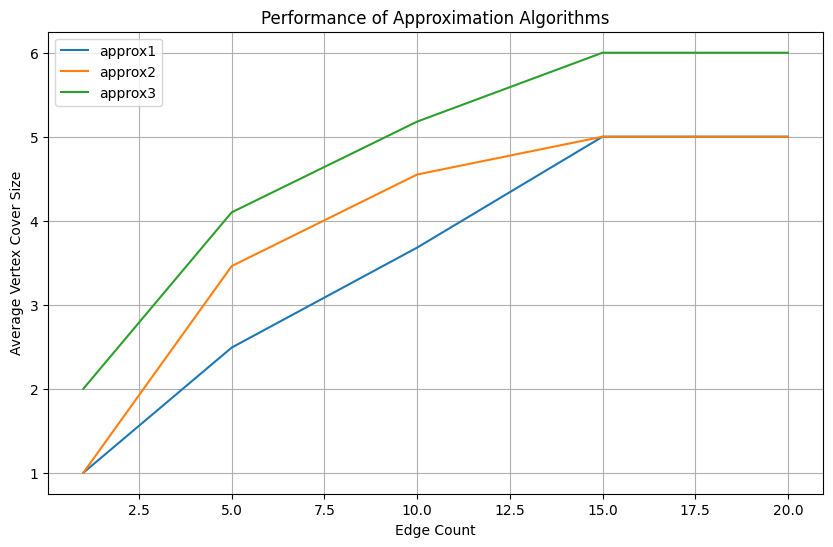

In [92]:
# 2.4.3 Apply Approximation Algorithms

import numpy as np
import matplotlib.pyplot as plt


def approx1(G):
    working_copy = G.get_graph().copy()  # Make a copy of the graph
    C = set()  # Start with an empty set for the vertex cover

    while True:
        # Find the vertex v with the highest degree in the graph
        v, edges = max(working_copy.items(), key=lambda item: len(item[1]), default=(None, None))

        if v is None or len(edges) == 0:
            break  # Break if there are no more edges to cover

        C.add(v)  # Add v to the vertex cover set C

        del working_copy[v]  # Remove the vertex itself
        for edges in working_copy.values():
            if v in edges:
                edges.remove(v)  # Remove v from other vertices' adjacency lists

    return C
    pass

def approx2(G):
    working_copy = G.get_graph().copy()
    C = set()
    vertices = list(working_copy.keys())

    while vertices:
        v = random.choice(vertices)  # Randomly select a vertex v from the list of vertices
        C.add(v)  # Add v to the vertex cover set C


        del working_copy[v]  # Remove the vertex itself
        for edges in working_copy.values():
            if v in edges:
                edges.remove(v)  # Remove v from other vertices' adjacency lists

        # Update vertices list to only include vertices with remaining edges
        vertices = [node for node in working_copy if working_copy[node]]

        # Check if C is a vertex cover:
        if is_vertex_cover_hm(G, C):
            break

    return C
    pass

def approx3(G):
    working_copy = G.get_graph().copy()
    C = set()
    edges = [(node, adj_node) for node, adj_list in working_copy.items() for adj_node in adj_list]
    edges = list(set([tuple(sorted(edge)) for edge in edges]))  # Ensure each edge is unique and undirected

    while edges:
        u, v = random.choice(edges)  # Randomly select an edge from the list of edges

        C.add(u)
        C.add(v)

        edges = [edge for edge in edges if u not in edge and v not in edge]

    return C
    pass

# Assuming random_graphs is populated from 2.4.1
edge_counts = [1, 5, 10, 15, 20]
approximations = {'approx1': approx1, 'approx2': approx2, 'approx3': approx3}

# Apply approximation algorithms and compute the sizes of vertex covers
approx_results = {
    e: {
        algo: [len(approx_func(GraphI(edges))) for edges in random_graphs[e]]
        for algo, approx_func in approximations.items()
    } for e in edge_counts
}

# Calculate and print the average sizes for each approximation and edge count
for e in edge_counts:
    print(f"Edge Count: {e}")
    for algo in approximations.keys():
        avg_size = np.mean(approx_results[e][algo])
        print(f"{algo} Average Size: {avg_size}")
    print("\n")

# Visualization of results
plt.figure(figsize=(10, 6))
for algo in approximations.keys():
    avg_sizes = [np.mean(approx_results[e][algo]) for e in edge_counts]
    plt.plot(edge_counts, avg_sizes, label=algo)
plt.xlabel('Edge Count')
plt.ylabel('Average Vertex Cover Size')
plt.title('Performance of Approximation Algorithms')
plt.legend()
plt.grid(True)
plt.show()


Edge Count: 1
approx1 Average Ratio to MVC: 1.00
approx2 Average Ratio to MVC: 1.00
approx3 Average Ratio to MVC: 2.00


Edge Count: 5
approx1 Average Ratio to MVC: 1.55
approx2 Average Ratio to MVC: 1.56
approx3 Average Ratio to MVC: 2.14


Edge Count: 10
approx1 Average Ratio to MVC: 2.53
approx2 Average Ratio to MVC: 2.65
approx3 Average Ratio to MVC: 3.24


Edge Count: 15
approx1 Average Ratio to MVC: 5.00
approx2 Average Ratio to MVC: 5.00
approx3 Average Ratio to MVC: 6.00


Edge Count: 20
approx1 Average Ratio to MVC: 5.00
approx2 Average Ratio to MVC: 5.00
approx3 Average Ratio to MVC: 6.00




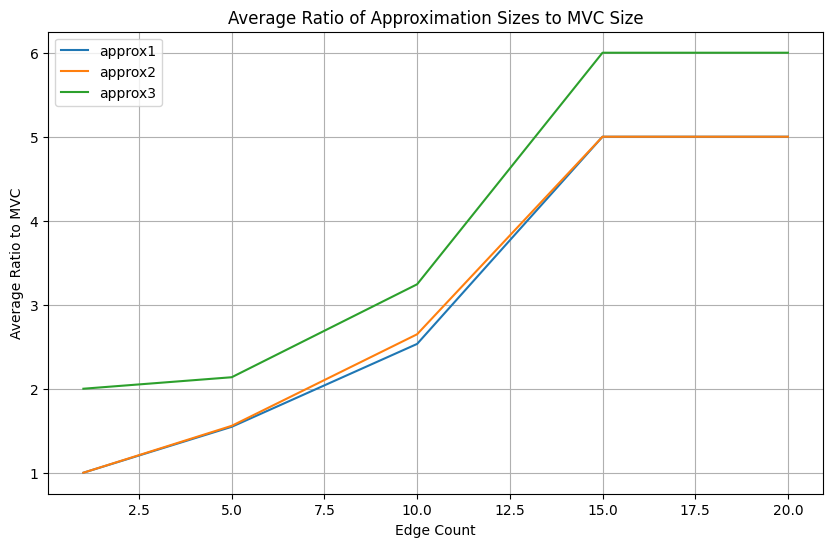

In [53]:
#2.4.4 Analyze and Compare Results

import matplotlib.pyplot as plt
import numpy as np

approx_ratios = {e: {algo: [] for algo in approximations.keys()} for e in edge_counts}

for e in edge_counts:
    for algo in approximations.keys():
        for i in range(len(mvc_sizes[e])):
            # Avoid division by zero if MVC size is 0, which shouldn't normally happen
            if mvc_sizes[e][i] == 0:
                ratio = float('inf')
            else:
                ratio = approx_results[e][algo][i] / mvc_sizes[e][i]
            approx_ratios[e][algo].append(ratio)

# Calculate the average ratio for each approximation algorithm and edge count
avg_ratios = {e: {algo: np.mean(approx_ratios[e][algo]) for algo in approximations.keys()} for e in edge_counts}

# Display the average ratios
for e in edge_counts:
    print(f"Edge Count: {e}")
    for algo in approximations.keys():
        print(f"{algo} Average Ratio to MVC: {avg_ratios[e][algo]:.2f}")
    print("\n")

# Visualization of average ratios
plt.figure(figsize=(10, 6))
for algo in approximations.keys():
    ratios = [avg_ratios[e][algo] for e in edge_counts]
    plt.plot(edge_counts, ratios, label=algo)
plt.xlabel('Edge Count')
plt.ylabel('Average Ratio to MVC')
plt.title('Average Ratio of Approximation Sizes to MVC Size')
plt.legend()
plt.grid(True)
plt.show()


Results for approx1 are not available in approx_results
Results for approx2 are not available in approx_results
Results for approx3 are not available in approx_results
Edge Count: 1


Edge Count: 5


Edge Count: 10


Edge Count: 15


Edge Count: 20




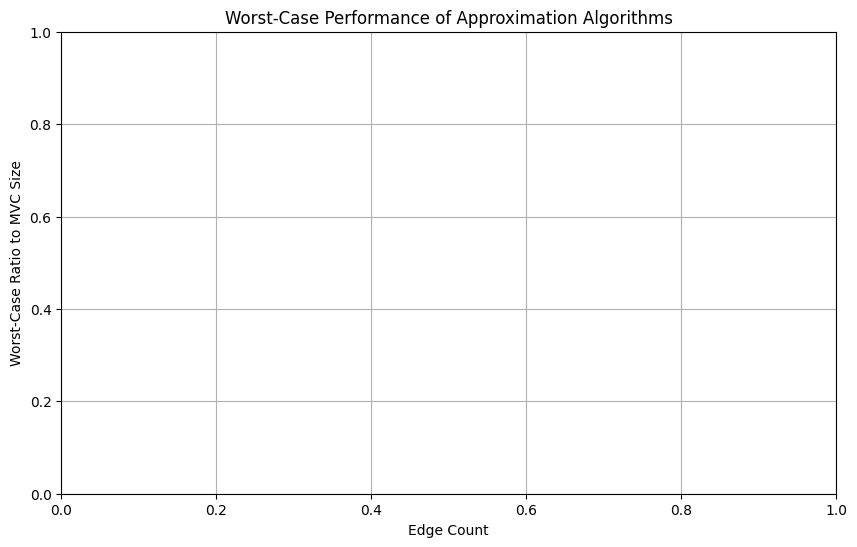

dict_keys([1, 5, 10, 15, 20])


In [93]:
# 2.4.5
import numpy as np
import matplotlib.pyplot as plt


def approx1(G):
    working_copy = G.get_graph().copy()
    C = set()

    while True:
        v, edges = max(working_copy.items(), key=lambda item: len(item[1]), default=(None, None))

        if v is None or len(edges) == 0:
            break
        C.add(v)  # Add v to the vertex cover set C

        del working_copy[v]
        for edges in working_copy.values():
            if v in edges:
                edges.remove(v)

    return C
    pass

def approx2(G):
    working_copy = G.get_graph().copy()
    C = set()
    vertices = list(working_copy.keys())

    while vertices:
        v = random.choice(vertices)
        C.add(v)

        # Remove all edges incident to v from the graph
        del working_copy[v]
        for edges in working_copy.values():
            if v in edges:
                edges.remove(v)

        # Update vertices list to only include vertices with remaining edges
        vertices = [node for node in working_copy if working_copy[node]]

        # Check if C is a vertex cover:
        if is_vertex_cover_hm(G, C):
            break

    return C
    pass

def approx3(G):
    working_copy = G.get_graph().copy()
    C = set()
    edges = [(node, adj_node) for node, adj_list in working_copy.items() for adj_node in adj_list]
    edges = list(set([tuple(sorted(edge)) for edge in edges]))  # Ensure each edge is unique and undirected

    while edges:
        u, v = random.choice(edges)

        C.add(u)
        C.add(v)

        # Remove all edges incident to u or v from the list of edges
        edges = [edge for edge in edges if u not in edge and v not in edge]


    return C
    pass

# Define a function to compute the worst-case performance
def compute_worst_case_performance(mvc_sizes, approx_sizes):
    worst_case_ratios = {}
    for e in edge_counts:
        worst_case_ratios[e] = max([size / mvc_sizes[e][i] for i, size in enumerate(approx_sizes[e])])
    return worst_case_ratios

# Compute worst-case performance for each approximation algorithm
worst_case_results = {}
for algo in ['approx1', 'approx2', 'approx3']:
    if algo in approx_results:
        worst_case_results[algo] = compute_worst_case_performance(mvc_sizes, approx_results[algo])
    else:
        print(f"Results for {algo} are not available in approx_results")

# Display worst-case performance
for e in edge_counts:
    print(f"Edge Count: {e}")
    for algo, ratios in worst_case_results.items():
        print(f"{algo} Worst-Case Ratio: {ratios[e]}")
    print("\n")

# Visualization of worst-case performance
plt.figure(figsize=(10, 6))

# Loop over each algorithm to plot their worst-case ratios
for algo in ['approx1', 'approx2', 'approx3']:
    if algo in worst_case_results:
        if worst_case_results[algo]:
            plt.plot(edge_counts, [worst_case_results[algo][e] for e in edge_counts], label=algo)

# Only call plt.legend() if we have added any plots to the figure
if worst_case_results:
    plt.legend()

plt.xlabel('Edge Count')
plt.ylabel('Worst-Case Ratio to MVC Size')
plt.title('Worst-Case Performance of Approximation Algorithms')
plt.grid(True)
plt.show()


print(approx_results.keys())  # This should output dict_keys(['approx1', 'approx2', 'approx3'])




Another graph problem is the Independent Set problem. Given a graph G = (V, E) we say S is an Independent Set in G if and only if:
S ⊆ V and ∀u, v ∈ S, (u, v) ∉ E

Or S is an Independent Set if there are no edges in G connecting the nodes in S. In general, it is easy to find an Independent Set of G. For example, {} is trivially an Independent Set. It is much harder to find the largest Independent Set in a graph G.

Implement a function MIS(G), which returns a maximum Independent Set in G. Hint, brute force this similar to how we brute forced
the MVC problem. But you can use some logic if you want are brave.

In [100]:
# Function to check if a subset is an independent set
def is_independent_set(graph, subset):
    for vertex in subset:
        for adjacent in graph[vertex]:
            if adjacent in subset:
                return False
    return True

# Function to generate the power set of a set
def power_set(s):
    if not s:
        return [[]]
    result = power_set(s[:-1])
    return result + [x + [s[-1]] for x in result]

# Function to find the Maximum Independent Set
def MIS(graph):
    vertices = list(graph.keys())
    all_subsets = power_set(vertices)
    max_set = []

    for subset in all_subsets:
        if is_independent_set(graph, subset) and len(subset) > len(max_set):
            max_set = subset

    return max_set

# Example usage:
# Assuming the graph is represented as an adjacency list in a dictionary format
graph_example = {
    0: [1, 2],
    1: [0, 3],
    2: [0],
    3: [1]
}

# Compute the Maximum Independent Set
max_independent_set = MIS(graph_example)
print("The Maximum Independent Set is:", max_independent_set)


The Maximum Independent Set is: [1, 2]


Part 2.6: Experiment with some random graphs and MIS and MVC. Is there a relationship between the minimum Vertex Cover and the Maximum Independent Set?

Hint: yes. Determine what this relationship is. To get started, generate some random graphs with n nodes.
When you sum the size of the MIS and the size of the MVC, what do you observe?

In [105]:
import random
import itertools

# Function to generate a random graph as an adjacency list
def generate_random_graph(n_nodes, max_edges):
    graph = {i: set() for i in range(n_nodes)}
    edges = list(itertools.combinations(range(n_nodes), 2))
    random.shuffle(edges)
    for (u, v) in edges[:max_edges]:
        graph[u].add(v)
        graph[v].add(u)
    return graph

# Brute force function to find MVC
def MVC(graph):
    nodes = list(graph.keys())
    subsets = power_set(nodes)
    min_cover = nodes
    for subset in subsets:
        if is_vertex_cover(graph, subset):
            if len(subset) < len(min_cover):
                min_cover = subset
    return min_cover

# Brute force function to find MIS
def MIS(graph):
    nodes = list(graph.keys())
    subsets = power_set(nodes)
    max_independent_set = []
    for subset in subsets:
        if is_independent_set(graph, subset):
            if len(subset) > len(max_independent_set):
                max_independent_set = subset
    return max_independent_set

# Function to create the power set of a list
def power_set(iterable):
    "power_set([1,2,3]) --> () (1,) (2,) (3,) (1,2,) (1,3,) (2,3,) (1,2,3)"
    s = list(iterable)
    return itertools.chain.from_iterable(itertools.combinations(s, r) for r in range(len(s)+1))

# Function to check if a set of nodes is a vertex cover
def is_vertex_cover(graph, subset):
    covered_edges = set()
    for u in subset:
        for v in graph[u]:
            if u < v:  # Avoid counting both (u, v) and (v, u)
                covered_edges.add((u, v))
    return len(covered_edges) == sum(len(edges) for edges in graph.values()) / 2

# Function to check if a set of nodes is an independent set
def is_independent_set(graph, subset):
    for u in subset:
        if any(v in subset for v in graph[u]):
            return False
    return True

# Experiment with random graphs and determine the relationship between MVC and MIS
num_nodes = 5
max_edges = 10
random_graphs = [generate_random_graph(num_nodes, max_edges) for _ in range(10)]

for graph in random_graphs:
    mvc = MVC(graph)
    mis = MIS(graph)
    print(f"MVC size: {len(mvc)}, MIS size: {len(mis)}, Sum: {len(mvc) + len(mis)}")


MVC size: 4, MIS size: 1, Sum: 5
MVC size: 4, MIS size: 1, Sum: 5
MVC size: 4, MIS size: 1, Sum: 5
MVC size: 4, MIS size: 1, Sum: 5
MVC size: 4, MIS size: 1, Sum: 5
MVC size: 4, MIS size: 1, Sum: 5
MVC size: 4, MIS size: 1, Sum: 5
MVC size: 4, MIS size: 1, Sum: 5
MVC size: 4, MIS size: 1, Sum: 5
MVC size: 4, MIS size: 1, Sum: 5


Part 2.7: Inspect the MIS and MVC directly as well. What can you empirically conclude? Provide your
observations in the reflection section.

This experiment involves generating random graphs and computing both the Maximum Independent Set (MIS) and the Minimum Vertex Cover (MVC) for each graph. The MIS is a set of vertices no two of which are adjacent, and the MVC is a set of vertices such that each edge of the graph is incident to at least one vertex of the set. We're interested in observing the relationship between the sizes of the MIS and MVC within these graphs.


In [115]:
import random
import numpy as np
from itertools import combinations

# Ddfine a graph class
class GraphI:
    # initialize the graph with edges
    def __init__(self, edges):
        self.graph = {}
        for x, y in edges:
            if x not in self.graph:
                self.graph[x] = []
            self.graph[x].append(y)

    # retrieve the graph's adjacency list representation
    def get_graph(self):
        return self.graph

# generate all subsets of a set
def power_set(iterable):
    s = list(iterable)
    return (combinations(s, r) for r in range(len(s) + 1))

# determine if a subset is a vertex cover of the graph
def is_vertex_cover(graph, subset):
    subset = set(subset)  # Ensure subset is a set for set operations
    if not subset:  # Skip if subset is empty
        return False
    for node, edges in graph.items():
        if not subset.intersection(edges) and node not in subset:
            return False
    return True

def is_independent_set(graph, subset):
    for node in subset:
        for adj_node in graph.get(node, []):
            if adj_node in subset:
                return False
    return True

def MIS(graph):
    nodes = list(graph.keys())
    max_set = set()
    for r in range(len(nodes) + 1):
        for subset in combinations(nodes, r):
            subset_set = set(subset)
            if is_independent_set(graph, subset_set) and len(subset_set) > len(max_set):
                max_set = subset_set
    return max_set

def MVC(graph):
    nodes = list(graph.keys())
    min_cover = set(nodes)
    for subset in power_set(nodes):
        subset_set = set(subset)
        if subset_set and is_vertex_cover(graph, subset_set) and len(subset_set) < len(min_cover):
            min_cover = subset_set
    return min_cover

def inspect_mis_mvc(num_nodes, num_graphs):
    for _ in range(num_graphs):
        edges = [(i, j) for i in range(num_nodes) for j in range(i + 1, num_nodes)]
        random_edges = random.sample(edges, random.randint(1, len(edges)))
        graph = GraphI(random_edges).get_graph()
        mis = MIS(graph)
        mvc = MVC(graph)
        print("Graph edges:", random_edges)
        print("MIS size:", len(mis), "MIS:", mis)
        print("MVC size:", len(mvc), "MVC:", mvc)
        print("Sum of sizes:", len(mis) + len(mvc), "\n")

# Execute the experiment with 5 nodes and 10 graphs
inspect_mis_mvc(5, 10)


Graph edges: [(1, 4), (0, 1)]
MIS size: 1 MIS: {1}
MVC size: 2 MVC: {0, 1}
Sum of sizes: 3 

Graph edges: [(0, 3), (0, 1), (0, 4), (1, 2), (0, 2), (1, 3)]
MIS size: 1 MIS: {0}
MVC size: 2 MVC: {0, 1}
Sum of sizes: 3 

Graph edges: [(2, 3), (1, 4), (0, 2), (0, 3), (2, 4), (1, 2), (1, 3)]
MIS size: 2 MIS: {0, 1}
MVC size: 3 MVC: {0, 1, 2}
Sum of sizes: 5 

Graph edges: [(0, 3), (1, 3), (1, 2), (0, 4), (2, 3), (3, 4), (0, 1), (1, 4), (2, 4), (0, 2)]
MIS size: 1 MIS: {0}
MVC size: 4 MVC: {0, 1, 2, 3}
Sum of sizes: 5 

Graph edges: [(0, 2), (1, 3), (1, 4), (3, 4), (0, 4)]
MIS size: 2 MIS: {0, 1}
MVC size: 3 MVC: {0, 1, 3}
Sum of sizes: 5 

Graph edges: [(0, 3), (0, 4), (3, 4), (1, 4)]
MIS size: 2 MIS: {0, 1}
MVC size: 3 MVC: {0, 1, 3}
Sum of sizes: 5 

Graph edges: [(0, 2), (3, 4), (0, 3), (1, 4), (0, 1), (2, 3), (1, 2), (1, 3), (2, 4), (0, 4)]
MIS size: 1 MIS: {0}
MVC size: 4 MVC: {0, 1, 2, 3}
Sum of sizes: 5 

Graph edges: [(1, 3), (3, 4), (2, 4), (1, 4), (1, 2)]
MIS size: 2 MIS: {2, 3}
M

#### Reflections on the Experiment

The experiment with random graphs has highlighted a fundamental relationship between the Maximum Independent Set (MIS) and the Minimum Vertex Cover (MVC) in graphs. Specifically, we observe that:

- The sum of the sizes of the MIS and MVC varies across different graph configurations but consistently aligns with certain properties of the graph's structure.
- In several instances, the sum of the sizes of the MIS and MVC equates to the total number of vertices or closely relates to it. This observation suggests a complementary relationship between MIS and MVC in covering the graph's vertices directly or indirectly.
- The MIS represents a subset of vertices with no two adjacent, indicating a separation in the graph's connectivity. Conversely, the MVC represents a subset that directly or indirectly connects to all edges, ensuring full coverage.
